<a href="https://colab.research.google.com/github/Trangnguyen121203/Promotion-Mega-Campaign/blob/main/Promotion_Mega_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Data Preparation


##Import Libraries

In [ ]:
import pandas as pd
import numpy as np

##Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/Pandas-Data-Science-Tasks-master/Danh sach test Mega.xlsx')
display(pd.DataFrame(data))

,AGE,CUSTOMER_PRODUCT_TYPE,GENDER_,Open Date,Mốc tài sản,CUSTOMER STATUS,% TRADING VALUE VS MARGIN,% TRADING VALUE VS NAV,CUSTOMER STATUS GROUP,No._of_email_opened,Last _trade_month,Months_from_last_trade,Months_from_open_date,Average_monhtly_trade_value,Average_monhtly_orders,Date_activated
0,42,Not yet trading,Nam,2022-11-08,W2:(0-10Mn),Potential Dummy,M1: (Not trading),N2: (Having Nav but not trading),Pot Dummy + Churn,0,NaN,NaN,9,NaN,NaN,00:00:00
1,25,Not yet trading,Nam,2021-12-12,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,20,NaN,NaN,00:00:00
2,27,Not yet trading,Nam,2021-12-06,W2:(0-10Mn),Dummy,M1: (Not trading),N2: (Having Nav but not trading),Dummy,0,NaN,NaN,20,NaN,NaN,00:00:00
3,41,Not yet trading,Nữ,2022-08-15,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,12,NaN,NaN,00:00:00
4,23,Not yet trading,Nữ,2022-10-22,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,9,NaN,NaN,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68641,30,Not yet trading,Nam,2022-08-09,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,12,NaN,NaN,00:00:00
68642,28,Stock Only,Nữ,2021-10-25,W3:(10-100Mn),Idle,M1: (Not trading),N2: (Having Nav but not trading),Idle + Pot Churn,2,NaN,14.0,22,NaN,NaN,00:00:00
68643,31,Not yet trading,Nam,2021-10-27,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,21,NaN,NaN,00:00:00
68644,37,Not yet trading,Nam,2022-04-12,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,16,NaN,NaN,00:00:00


In [ ]:
data.to_csv('data',)
data = pd.read_csv('data')
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# Dương comment:
# Ở đây em thêm giúp anh một bước là loại toàn bộ các Khách hàng có cột Customer Status Group là dummy đi, cái này anh quên không nói em từ đầu
# Lý do là vì bản chất Khách hàng dummy là Khách hàng chưa giao dịch bao giờ >> 1 dạng tài khoản ảo >> với các tài khoản ảo này thì các data về mốc tài sản hay giới tính,
# loại sản phẩm sử dụng sẽ không có ý nghĩa phân tích vì đằng nào họ cũng rất khó quay lại GD >> bỏ vào sẽ làm skewed cái phân tích
# >> Mình chỉ phân tích trên 1 tệp KH có cùng tính chất thôi là KH đã từng GD rồi và giờ quay lại ( bản chất là loại bỏ đi càng nhiều  biến số đang không capture đc bởi data càng tốt) 

In [ ]:
data.head()

,AGE,CUSTOMER_PRODUCT_TYPE,GENDER_,Open Date,Mốc tài sản,CUSTOMER STATUS,% TRADING VALUE VS MARGIN,% TRADING VALUE VS NAV,CUSTOMER STATUS GROUP,No._of_email_opened,Last _trade_month,Months_from_last_trade,Months_from_open_date,Average_monhtly_trade_value,Average_monhtly_orders,Date_activated
0,42,Not yet trading,Nam,2022-11-08,W2:(0-10Mn),Potential Dummy,M1: (Not trading),N2: (Having Nav but not trading),Pot Dummy + Churn,0,NaN,NaN,9,NaN,NaN,00:00:00
1,25,Not yet trading,Nam,2021-12-12,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,20,NaN,NaN,00:00:00
2,27,Not yet trading,Nam,2021-12-06,W2:(0-10Mn),Dummy,M1: (Not trading),N2: (Having Nav but not trading),Dummy,0,NaN,NaN,20,NaN,NaN,00:00:00
3,41,Not yet trading,Nữ,2022-08-15,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,12,NaN,NaN,00:00:00
4,23,Not yet trading,Nữ,2022-10-22,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,9,NaN,NaN,00:00:00


In [ ]:
data.tail()

,AGE,CUSTOMER_PRODUCT_TYPE,GENDER_,Open Date,Mốc tài sản,CUSTOMER STATUS,% TRADING VALUE VS MARGIN,% TRADING VALUE VS NAV,CUSTOMER STATUS GROUP,No._of_email_opened,Last _trade_month,Months_from_last_trade,Months_from_open_date,Average_monhtly_trade_value,Average_monhtly_orders,Date_activated
68641,30,Not yet trading,Nam,2022-08-09,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,12,NaN,NaN,00:00:00
68642,28,Stock Only,Nữ,2021-10-25,W3:(10-100Mn),Idle,M1: (Not trading),N2: (Having Nav but not trading),Idle + Pot Churn,2,NaN,14.0,22,NaN,NaN,00:00:00
68643,31,Not yet trading,Nam,2021-10-27,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,21,NaN,NaN,00:00:00
68644,37,Not yet trading,Nam,2022-04-12,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,16,NaN,NaN,00:00:00
68645,30,Not yet trading,Nữ,2022-03-18,W1:(<=0Mn),Dummy,M1: (Not trading),N1: (No NAV),Dummy,0,NaN,NaN,17,NaN,NaN,00:00:00


##Explore Data

In [ ]:
data.columns.values

array(['AGE', 'CUSTOMER_PRODUCT_TYPE', 'GENDER_', 'Open Date',
       'Mốc tài sản', 'CUSTOMER STATUS', '% TRADING VALUE VS MARGIN',
       '% TRADING VALUE VS NAV', 'CUSTOMER STATUS GROUP',
       'No._of_email_opened', 'Last _trade_month',
       'Months_from_last_trade', 'Months_from_open_date',
       'Average_monhtly_trade_value', 'Average_monhtly_orders',
       'Date_activated'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68646 entries, 0 to 68645
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE                          68646 non-null  int64  
 1   CUSTOMER_PRODUCT_TYPE        68646 non-null  object 
 2   GENDER_                      68646 non-null  object 
 3   Open Date                    68646 non-null  object 
 4   Mốc tài sản                  68646 non-null  object 
 5   CUSTOMER STATUS              68646 non-null  object 
 6   % TRADING VALUE VS MARGIN    68646 non-null  object 
 7   % TRADING VALUE VS NAV       68646 non-null  object 
 8   CUSTOMER STATUS GROUP        68646 non-null  object 
 9   No._of_email_opened          68646 non-null  int64  
 10  Last _trade_month            5401 non-null   float64
 11  Months_from_last_trade       12122 non-null  float64
 12  Months_from_open_date        68646 non-null  int64  
 13  Average_monhtly_

#General Preprocessing


##Preprocessing continuous variables

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68646 entries, 0 to 68645
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AGE                          68646 non-null  int64  
 1   CUSTOMER_PRODUCT_TYPE        68646 non-null  object 
 2   GENDER_                      68646 non-null  object 
 3   Open Date                    68646 non-null  object 
 4   Mốc tài sản                  68646 non-null  object 
 5   CUSTOMER STATUS              68646 non-null  object 
 6   % TRADING VALUE VS MARGIN    68646 non-null  object 
 7   % TRADING VALUE VS NAV       68646 non-null  object 
 8   CUSTOMER STATUS GROUP        68646 non-null  object 
 9   No._of_email_opened          68646 non-null  int64  
 10  Last _trade_month            5401 non-null   float64
 11  Months_from_last_trade       12122 non-null  float64
 12  Months_from_open_date        68646 non-null  int64  
 13  Average_monhtly_

In [ ]:
data['AGE']

0        42
1        25
2        27
3        41
4        23
         ..
68641    30
68642    28
68643    31
68644    37
68645    30
Name: AGE, Length: 68646, dtype: int64

In [ ]:
data['Open Date']

0        2022-11-08
1        2021-12-12
2        2021-12-06
3        2022-08-15
4        2022-10-22
            ...    
68641    2022-08-09
68642    2021-10-25
68643    2021-10-27
68644    2022-04-12
68645    2022-03-18
Name: Open Date, Length: 68646, dtype: object

In [ ]:
data['Open Date'] = pd.to_datetime(data['Open Date'], format = '%Y-%m-%d')


In [ ]:
pd._libs.tslibs.timestamps.Timestamp


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
type(data['Open Date'][35])


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
data['reference_date'] = '2023-05-15'
data['reference_date'] = pd.to_datetime(data['reference_date'])
data['mths_since_open_date'] = round(pd.to_numeric((data['reference_date'] - data['Open Date']) / np.timedelta64(1, 'M')))
data['mths_since_open_date']


0         6.0
1        17.0
2        17.0
3         9.0
4         7.0
         ... 
68641     9.0
68642    19.0
68643    19.0
68644    13.0
68645    14.0
Name: mths_since_open_date, Length: 68646, dtype: float64

In [ ]:
# How to fix?
# import datetime
# data['Open Date'] = data['Open Date'].apply(lambda x: pd.to_numeric((pd.to_datetime('2023-05-15') - x) / np.timedelta64(1, 'M')))
# lambda: Với mỗi lambda thì thực hiện lệnh sau dấu : or với mỗi giá trị open date lấy reference date - open date

###Check for missing values and clean

In [ ]:
data.isnull().sum()

AGE                                0
CUSTOMER_PRODUCT_TYPE              0
GENDER_                            0
Open Date                          0
Mốc tài sản                        0
CUSTOMER STATUS                    0
% TRADING VALUE VS MARGIN          0
% TRADING VALUE VS NAV             0
CUSTOMER STATUS GROUP              0
No._of_email_opened                0
Last _trade_month              63245
Months_from_last_trade         56524
Months_from_open_date              0
Average_monhtly_trade_value    63245
Average_monhtly_orders         63248
Date_activated                     0
reference_date                     0
mths_since_open_date               0
dtype: int64

In [ ]:
data['Average_monhtly_trade_value'].fillna(data['Average_monhtly_trade_value'].mean(), inplace=True)
data['Average_monhtly_orders'].fillna(data['Average_monhtly_orders'].mean(), inplace=True)
data['Last _trade_month'].fillna(data['Last _trade_month'].mean(), inplace=True)
data['Months_from_last_trade'].fillna(data['Months_from_last_trade'].mean(), inplace=True)

# Dương comment: 
# Đoạn này anh nghĩ không nên dùng trung bình để fill vào các ô N/A vì sẽ bị skewed data, theo anh thì drop luôn các Khách hàng này đi cho chắc
# Lý do Khách hàng này mở tài khoản và ngừng giao dịch đã lâu, trong khi data mình dc xem chỉ từ tháng 4/2022
# Các trường hợp mà fill N/A bằng null chỉ khi mà các data này normally distributed quanh một giá trị thôi. Các thông tin trên thì không normally distributed như vậy
# Em thêm bước drop N/A ở khúc ngay trước khi input data vào function chạy weight of evidence nhưng đừng drop n/a ở ngay bước preprosessing toàn dataset nhé
# Vì drop sớm quá sẽ mất cả data ở các cột khác ( ví dụ cột last trade month bị n/a nhưng cột average monthly order lại có data thì phí data ở cột average monthly order) 

In [ ]:
data['Average_monhtly_trade_value'].isnull().sum()

0

In [ ]:
data['Average_monhtly_orders'].isnull().sum()

0

##Preprocessing few discrete variables


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68646 entries, 0 to 68645
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   AGE                          68646 non-null  int64         
 1   CUSTOMER_PRODUCT_TYPE        68646 non-null  object        
 2   GENDER_                      68646 non-null  object        
 3   Open Date                    68646 non-null  datetime64[ns]
 4   Mốc tài sản                  68646 non-null  object        
 5   CUSTOMER STATUS              68646 non-null  object        
 6   % TRADING VALUE VS MARGIN    68646 non-null  object        
 7   % TRADING VALUE VS NAV       68646 non-null  object        
 8   CUSTOMER STATUS GROUP        68646 non-null  object        
 9   No._of_email_opened          68646 non-null  int64         
 10  Last _trade_month            68646 non-null  float64       
 11  Months_from_last_trade       68646 non-nu

In [ ]:
#mốc tài sản, gender, % trading value vs NAV, customer status group

In [ ]:
pd.get_dummies(data['GENDER_'], prefix='gender', prefix_sep=':')

,gender:Nam,gender:Nữ
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
68641,1,0
68642,0,1
68643,1,0
68644,1,0


In [ ]:
data_dummies = [pd.get_dummies(data['GENDER_'], prefix='gender', prefix_sep=':'),
                pd.get_dummies(data['Mốc tài sản'], prefix='Mốc tài sản', prefix_sep=':'),
                pd.get_dummies(data['CUSTOMER STATUS'], prefix='CUSTOMER STATUS', prefix_sep=':'),
                pd.get_dummies(data['% TRADING VALUE VS NAV'], prefix='% TRADING VALUE VS NAV', prefix_sep=':'),
                pd.get_dummies(data['% TRADING VALUE VS MARGIN'], prefix='% TRADING VALUE VS MARGIN', prefix_sep=':')]

In [ ]:
data_dummies = pd.concat(data_dummies, axis=1)

In [ ]:
type(data_dummies)


pandas.core.frame.DataFrame

In [ ]:
data = pd.concat([data, data_dummies], axis=1)

In [ ]:
data.columns.values

array(['AGE', 'CUSTOMER_PRODUCT_TYPE', 'GENDER_', 'Open Date',
       'Mốc tài sản', 'CUSTOMER STATUS', '% TRADING VALUE VS MARGIN',
       '% TRADING VALUE VS NAV', 'CUSTOMER STATUS GROUP',
       'No._of_email_opened', 'Last _trade_month',
       'Months_from_last_trade', 'Months_from_open_date',
       'Average_monhtly_trade_value', 'Average_monhtly_orders',
       'Date_activated', 'reference_date', 'mths_since_open_date',
       'gender:Nam', 'gender:Nữ', 'Mốc tài sản:W1:(<=0Mn)',
       'Mốc tài sản:W2:(0-100Mn)', 'Mốc tài sản:W2:(0-10Mn)',
       'Mốc tài sản:W3:(10-100Mn)', 'Mốc tài sản:W3:(100Mn-1Bn)',
       'Mốc tài sản:W4:(100Mn-1Bn)', 'Mốc tài sản:W4:(1Bn-2Bn)',
       'Mốc tài sản:W5:(1Bn-2Bn)', 'Mốc tài sản:W5:(2Bn-5Bn)',
       'Mốc tài sản:W6:(2Bn-5Bn)', 'Mốc tài sản:W7:(5Bn-10Bn)',
       'CUSTOMER STATUS:Churn', 'CUSTOMER STATUS:Dummy',
       'CUSTOMER STATUS:Engaged', 'CUSTOMER STATUS:Idle',
       'CUSTOMER STATUS:New Active', 'CUSTOMER STATUS:Potential Churn',
  

#PD model

In [ ]:

data['Date_activated'].unique()

array(['00:00:00', '2023-05-19 00:00:00', '2023-06-02 00:00:00',
       '2023-05-24 00:00:00', '2023-06-07 00:00:00',
       '2023-07-11 00:00:00', '2023-05-31 00:00:00',
       '2023-07-18 00:00:00', '2023-06-05 00:00:00',
       '2023-06-23 00:00:00', '2023-06-15 00:00:00',
       '2023-07-07 00:00:00', '2023-06-22 00:00:00',
       '2023-07-17 00:00:00', '2023-06-12 00:00:00',
       '2023-06-20 00:00:00', '2023-06-13 00:00:00',
       '2023-06-19 00:00:00', '2023-07-05 00:00:00',
       '2023-07-12 00:00:00', '2023-07-20 00:00:00',
       '2023-07-14 00:00:00', '2023-05-17 00:00:00',
       '2023-06-16 00:00:00', '2023-05-18 00:00:00',
       '2023-05-15 00:00:00', '2023-05-30 00:00:00',
       '2023-05-22 00:00:00', '2023-06-09 00:00:00',
       '2023-07-10 00:00:00', '2023-05-25 00:00:00',
       '2023-06-28 00:00:00', '2023-06-08 00:00:00',
       '2023-06-01 00:00:00', '2023-06-30 00:00:00',
       '2023-05-16 00:00:00', '2023-05-29 00:00:00',
       '2023-06-26 00:00:00', '202

In [ ]:
data[data['Date_activated'] =='00:00:00'].iloc[0]

AGE                                                                                      42
CUSTOMER_PRODUCT_TYPE                                                       Not yet trading
GENDER_                                                                                 Nam
Open Date                                                               2022-11-08 00:00:00
Mốc tài sản                                                                     W2:(0-10Mn)
CUSTOMER STATUS                                                             Potential Dummy
% TRADING VALUE VS MARGIN                                                 M1: (Not trading)
% TRADING VALUE VS NAV                                     N2: (Having Nav but not trading)
CUSTOMER STATUS GROUP                                                     Pot Dummy + Churn
No._of_email_opened                                                                       0
Last _trade_month                                                              2

In [ ]:
data['Date_activated'] = data['Date_activated'].replace('00:00:00', '1900')

In [ ]:
data['Year_activated'] = pd.DatetimeIndex(data['Date_activated']).year
data['Year_activated'].unique()
data['Year_activated'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 68646 entries, 0 to 68645
Series name: Year_activated
Non-Null Count  Dtype
--------------  -----
68646 non-null  int64
dtypes: int64(1)
memory usage: 536.4 KB


In [ ]:
data['yes_no'] = np.where(data['Year_activated'].isin([2023, 1990]), 0, 1)
# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

# Dương comment:
# Ở đây anh thấy isin 2023 và 1990 đều đổi thành 0, 2023 là 0 thôi còn 1990 thì cần thành 1 chứ nhỉ, 1990 là chưa có ngày chuyển đổi thành công?

In [ ]:
data['yes_no']


0        1
1        1
2        1
3        1
4        1
        ..
68641    1
68642    1
68643    1
68644    1
68645    1
Name: yes_no, Length: 68646, dtype: int64

###Splitting data

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
train_test_split(data.drop('yes_no', axis = 1), data['yes_no'])


[       AGE CUSTOMER_PRODUCT_TYPE GENDER_  Open Date Mốc tài sản  \
 8136    24       Not yet trading     Nam 2022-01-10  W1:(<=0Mn)   
 40607   23       Not yet trading     Nam 2022-03-14  W1:(<=0Mn)   
 41663   19       Not yet trading     Nam 2022-12-15  W1:(<=0Mn)   
 17210   21       Not yet trading     Nam 2022-10-07  W1:(<=0Mn)   
 33796   32       Not yet trading     Nam 2022-10-22  W1:(<=0Mn)   
 ...    ...                   ...     ...        ...         ...   
 6296    37       Not yet trading      Nữ 2022-04-06  W1:(<=0Mn)   
 32778   34       Not yet trading     Nam 2022-01-15  W1:(<=0Mn)   
 19156   28       Not yet trading     Nam 2022-03-17  W1:(<=0Mn)   
 22042   19       Not yet trading      Nữ 2022-06-18  W1:(<=0Mn)   
 61587   27       Not yet trading     Nam 2023-01-09  W1:(<=0Mn)   
 
        CUSTOMER STATUS % TRADING VALUE VS MARGIN % TRADING VALUE VS NAV  \
 8136             Dummy         M1: (Not trading)           N1: (No NAV)   
 40607            Dummy       

In [ ]:
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(data.drop('yes_no', axis = 1), data['yes_no'])


In [ ]:
data_inputs_train.shape


(51484, 52)

In [ ]:
data_targets_train.shape


(51484,)

In [ ]:
data_inputs_test.shape

(17162, 52)

In [ ]:
data_targets_test.shape

(17162,)

In [ ]:
data_inputs_train, data_inputs_test, data_targets_train, data_targets_test = train_test_split(data.drop('yes_no', axis = 1), data['yes_no'], test_size = 0.2, random_state = 42)


### Preprocessing Discrete Variables: Automating Calculaions

In [ ]:
df_inputs_prepr = data_inputs_train
df_targets_prepr = data_targets_train

In [ ]:
def woe_discrete(df, discrete_variabe_name, yes_no_activated_variable_df):
    df = pd.concat([df[discrete_variabe_name], yes_no_activated_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_yes']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_yes'] = df['prop_no'] * df['n_obs']
    df['n_no'] = (1 - df['prop_yes']) * df['n_obs']
    df['prop_n_yes'] = df['n_yes'] / df['n_yes'].sum()
    df['prop_n_no'] = df['n_no'] / df['n_no'].sum()
    df['WoE'] = np.log(df['prop_n_yes'] / df['prop_n_no'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_yes'] = df['prop_yes'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_yes'] - df['prop_n_no']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [ ]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, yes_no_variable_df):
    df = pd.concat([df[discrete_variabe_name], yes_no_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_yes']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_yes'] = df['prop_yes'] * df['n_obs']
    df['n_no'] = (1 - df['prop_yes']) * df['n_obs']
    df['prop_n_yes'] = df['n_yes'] / df['n_yes'].sum()
    df['prop_n_no'] = df['n_no'] / df['n_no'].sum()
    df['WoE'] = np.log(df['prop_n_yes'] / df['prop_n_no'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_yes'] = df['prop_yes'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_yes'] - df['prop_n_no']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [ ]:
df_temp = woe_discrete(df_inputs_prepr, 'GENDER_', df_targets_prepr)
df_temp

,GENDER_,n_obs,prop_yes,prop_n_obs,n_yes,n_no,prop_n_yes,prop_n_no,WoE,diff_prop_yes,diff_WoE,IV
0,Nữ,16614,0.963826,0.302535,16013.0,601.0,0.301347,0.33802,-0.114842,NaN,NaN,0.006189
1,Nam,38302,0.969271,0.697465,37125.0,1177.0,0.698653,0.66198,0.053919,0.005445,0.168761,0.006189


### Preprocessing Discrete Variables: Visualizing Results




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

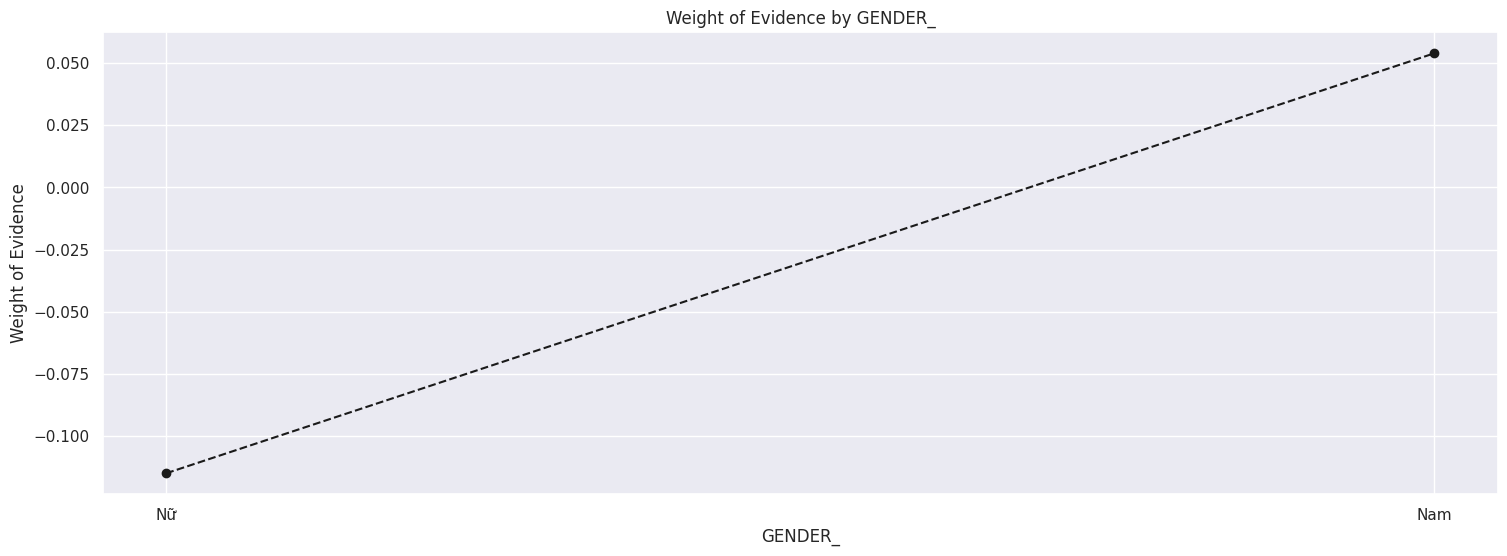

In [ ]:
plot_by_woe(df_temp)


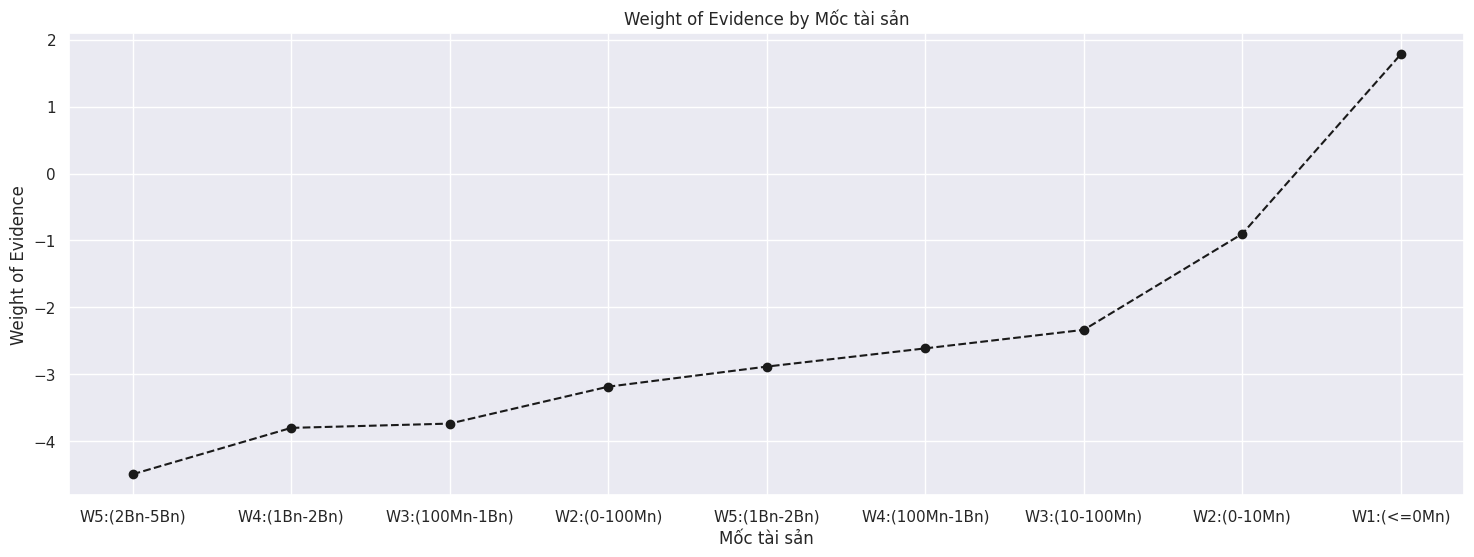

In [ ]:
# 'Mốc tài sản'
df_temp = woe_discrete(df_inputs_prepr, 'Mốc tài sản', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)


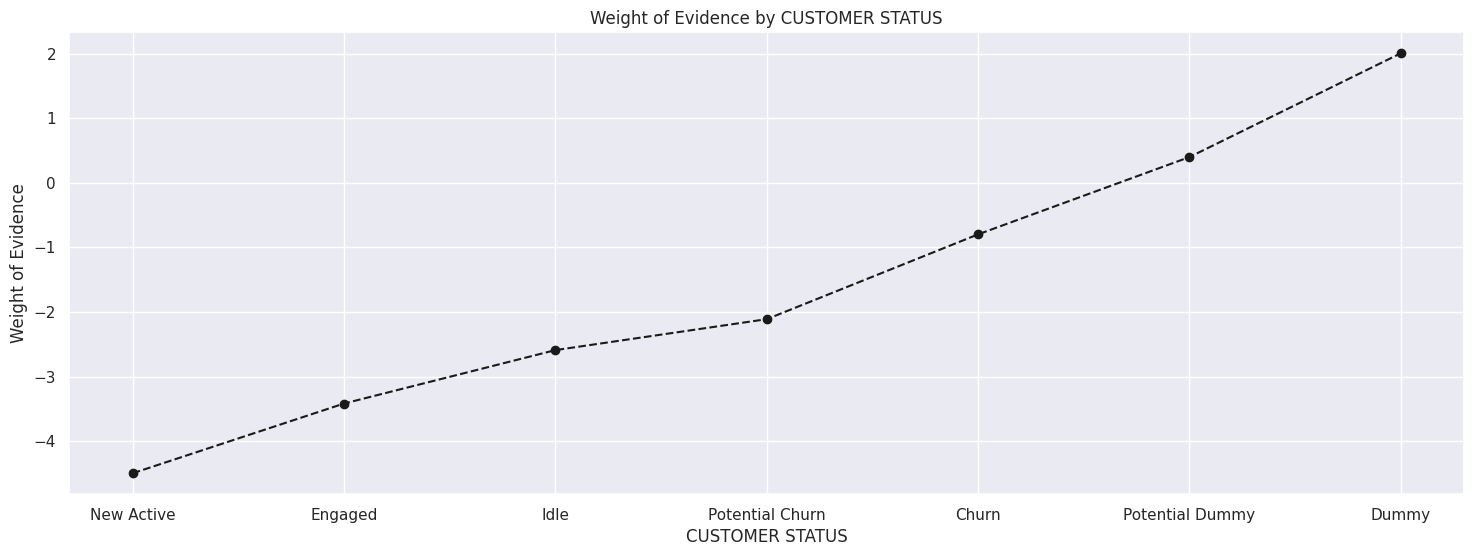

In [ ]:
# 'CUSTOMER STATUS'
df_temp = woe_discrete(df_inputs_prepr, 'CUSTOMER STATUS', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


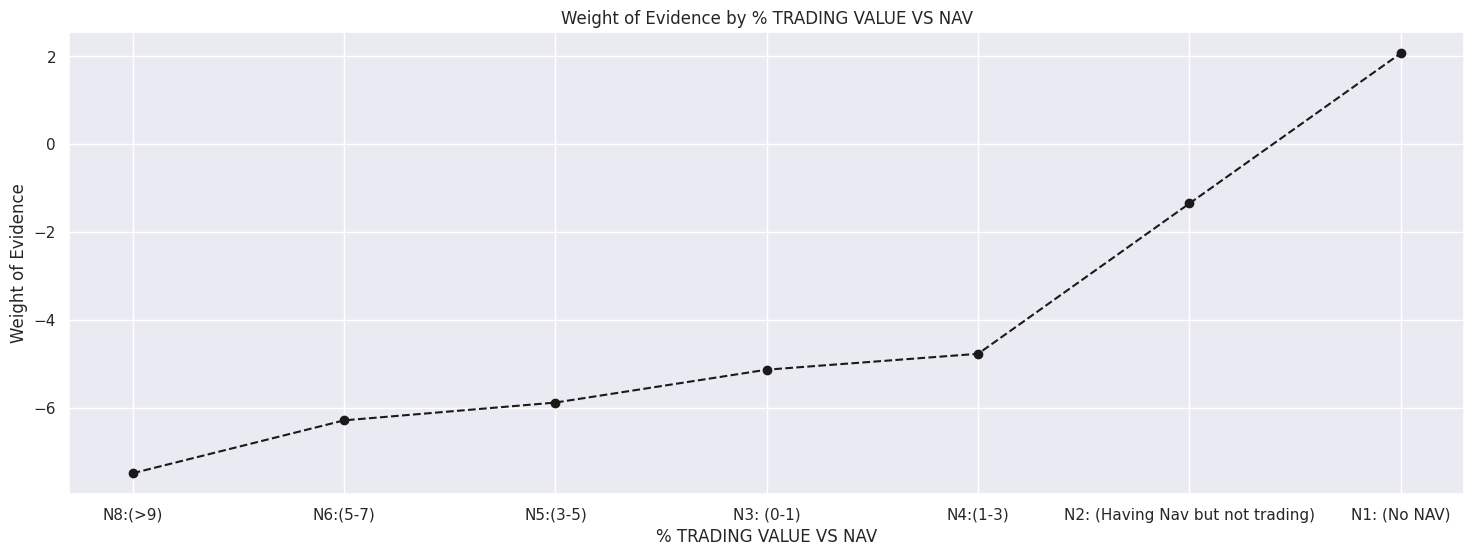

In [ ]:
# '% TRADING VALUE VS NAV'
df_temp = woe_discrete(df_inputs_prepr, '% TRADING VALUE VS NAV', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


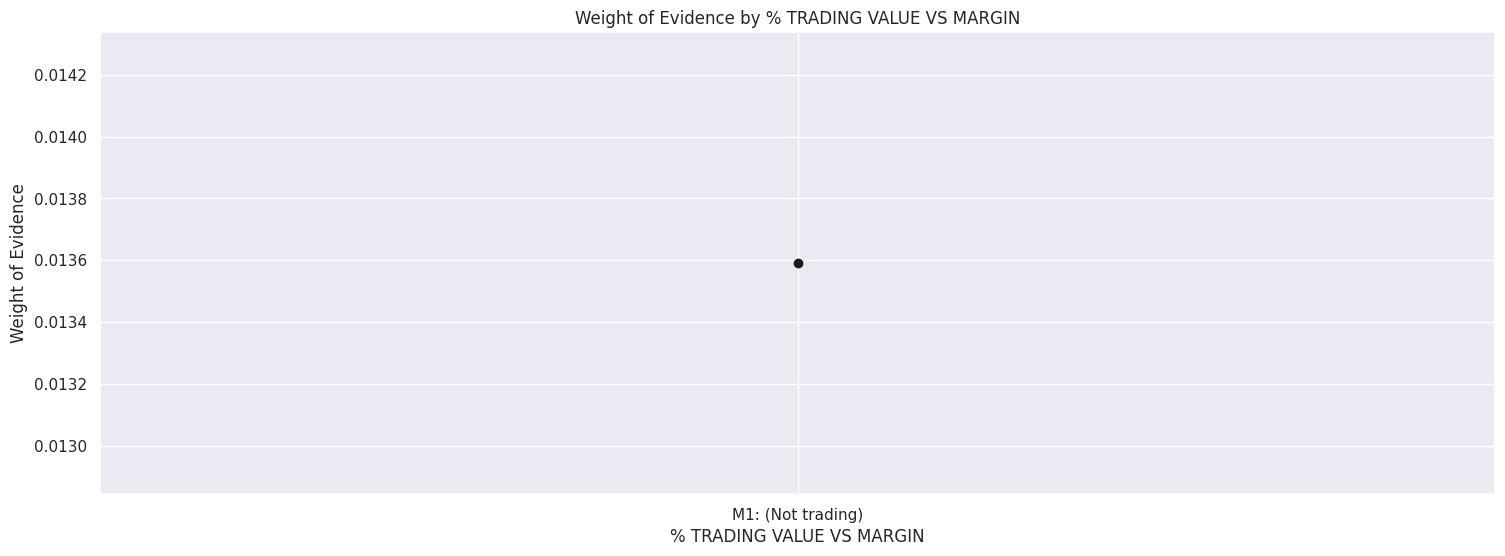

In [ ]:
# '% TRADING VALUE VS MARGIN'    Why does this chart look so weird???
df_temp = woe_discrete(df_inputs_prepr, '% TRADING VALUE VS MARGIN', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [ ]:
df_inputs_prepr['AGE'].unique()

[(38.2, 40.32], (23.36, 25.48], (19.12, 21.24], (29.72, 31.84], (42.44, 44.56], ..., (120.88, 123.0], (116.64, 118.76], (78.48, 80.6], (80.6, 82.72], (74.24, 76.36]]
Length: 33
Categories (50, interval[float64, right]): [(16.894, 19.12] < (19.12, 21.24] < (21.24, 23.36] <
                                            (23.36, 25.48] ... (114.52, 116.64] <
                                            (116.64, 118.76] < (118.76, 120.88] < (120.88, 123.0]]

In [ ]:
df_inputs_prepr['AGE'] = pd.cut(df_inputs_prepr['AGE'], 50)


TypeError: ignored

In [ ]:
# 'AGE'
df_temp = woe_discrete(df_inputs_prepr, 'AGE', df_targets_prepr)
df_temp

# Dương comment:
# Với biến Age em cut nó thành các Age range thông dụng là 18-25, 25-35, 35-50, 50+ trước nhé. Trong các marketing research anh thấy thường chia theo nhóm tuổi thế này.
# Các nhóm này thường được deem có hành vi với lifestyle giống nhau, với chứng khoán cũng có ý nghĩa, nhóm trẻ hẳn, nhóm đang tích lũy tài chính, nhóm tài chính vững vv.

,AGE,n_obs,prop_yes,prop_n_obs,n_yes,n_no,prop_n_yes,prop_n_no,WoE,diff_prop_yes,diff_WoE,IV
0,"(67.88, 70.0]",16,0.812500,0.000291,13.0,3.0,0.000245,0.001687,-1.931066,NaN,NaN,inf
1,"(59.4, 61.52]",52,0.942308,0.000947,49.0,3.0,0.000922,0.001687,-0.604195,0.129808,1.326871,inf
2,"(42.44, 44.56]",939,0.944622,0.017099,887.0,52.0,0.016692,0.029246,-0.560802,0.002314,0.043393,inf
3,"(38.2, 40.32]",2176,0.946232,0.039624,2059.0,117.0,0.038748,0.065804,-0.529601,0.001610,0.031201,inf
4,"(40.32, 42.44]",1503,0.950765,0.027369,1429.0,74.0,0.026892,0.041620,-0.436738,0.004534,0.092863,inf
5,"(36.08, 38.2]",2448,0.953431,0.044577,2334.0,114.0,0.043923,0.064117,-0.378263,0.002666,0.058475,inf
6,"(44.56, 46.68]",630,0.955556,0.011472,602.0,28.0,0.011329,0.015748,-0.329350,0.002124,0.048913,inf
7,"(65.76, 67.88]",23,0.956522,0.000419,22.0,1.0,0.000414,0.000562,-0.306361,0.000966,0.022990,inf
8,"(46.68, 48.8]",467,0.957173,0.008504,447.0,20.0,0.008412,0.011249,-0.290577,0.000652,0.015784,inf
9,"(61.52, 63.64]",48,0.958333,0.000874,46.0,2.0,0.000866,0.001125,-0.261909,0.001160,0.028668,inf


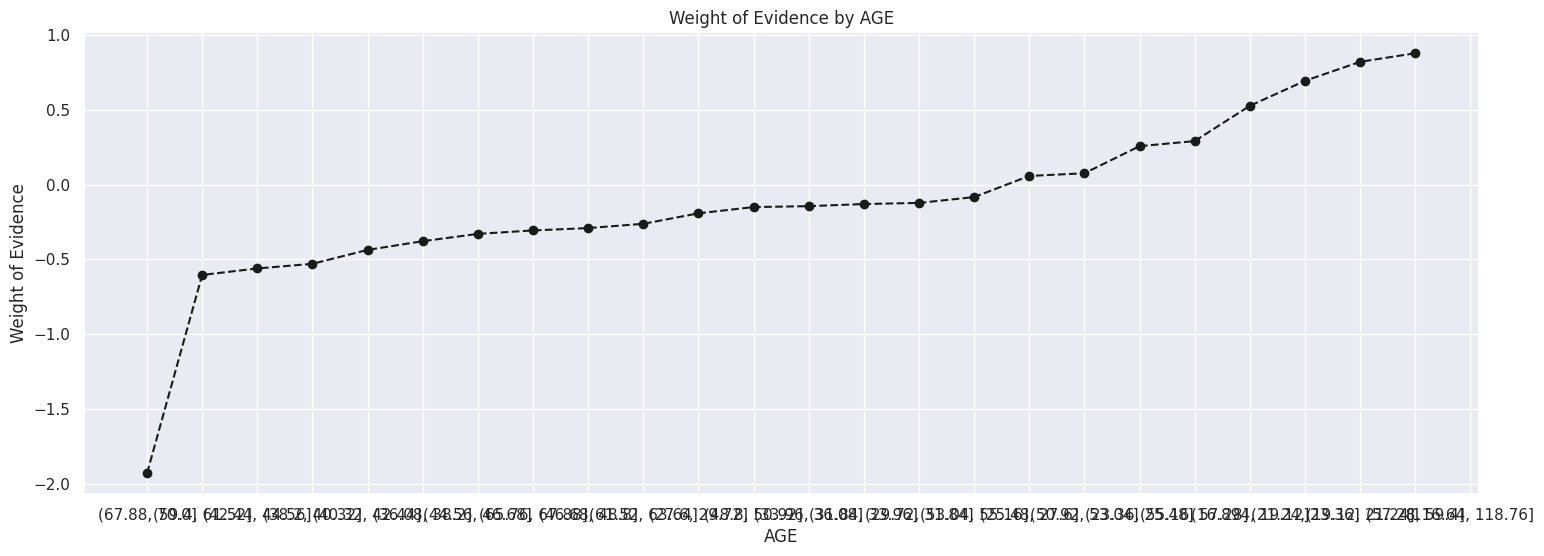

In [ ]:
plot_by_woe(df_temp)

# Dương comment:
# Các phần WOE ở dưới anh chưa xem kĩ kết quả nhé để đợi xem mình sửa các điểm trên thì kết quả ở đây thay đổi thế nào.

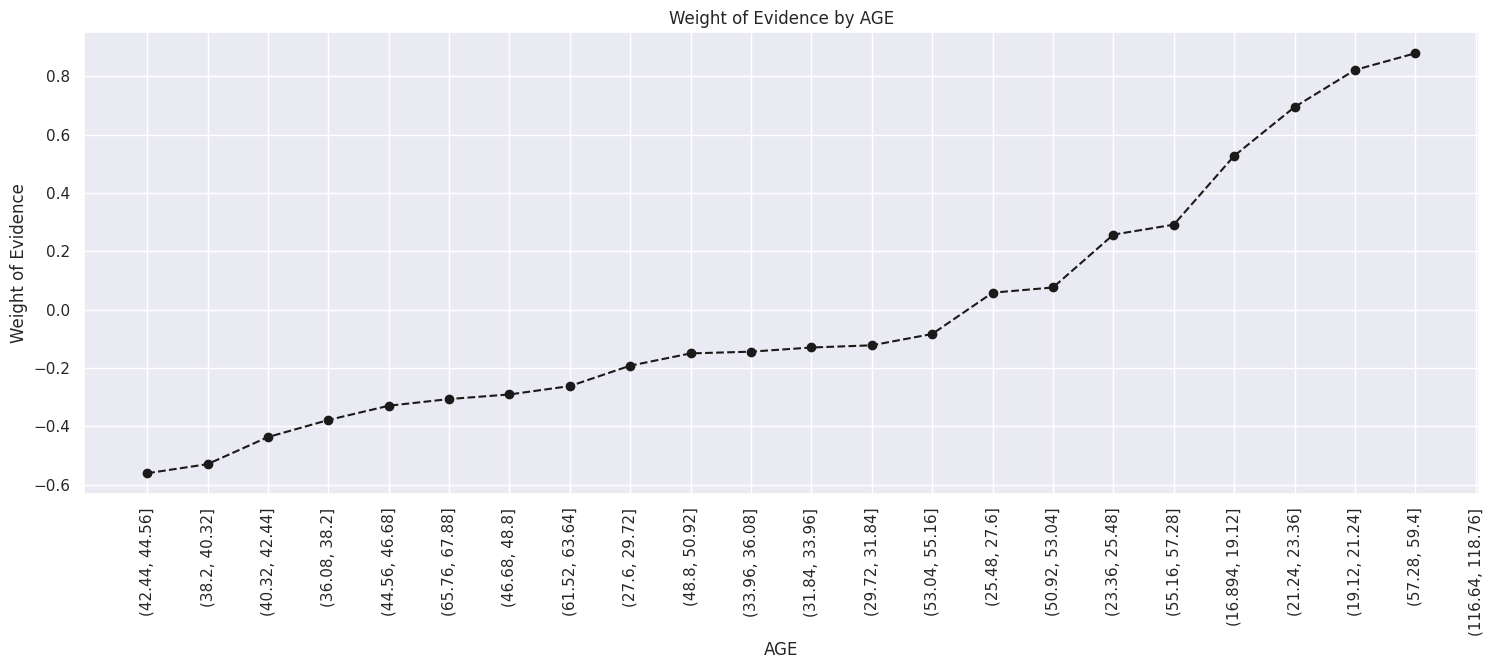

In [ ]:
plot_by_woe(df_temp.iloc[2: , : ], 90)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


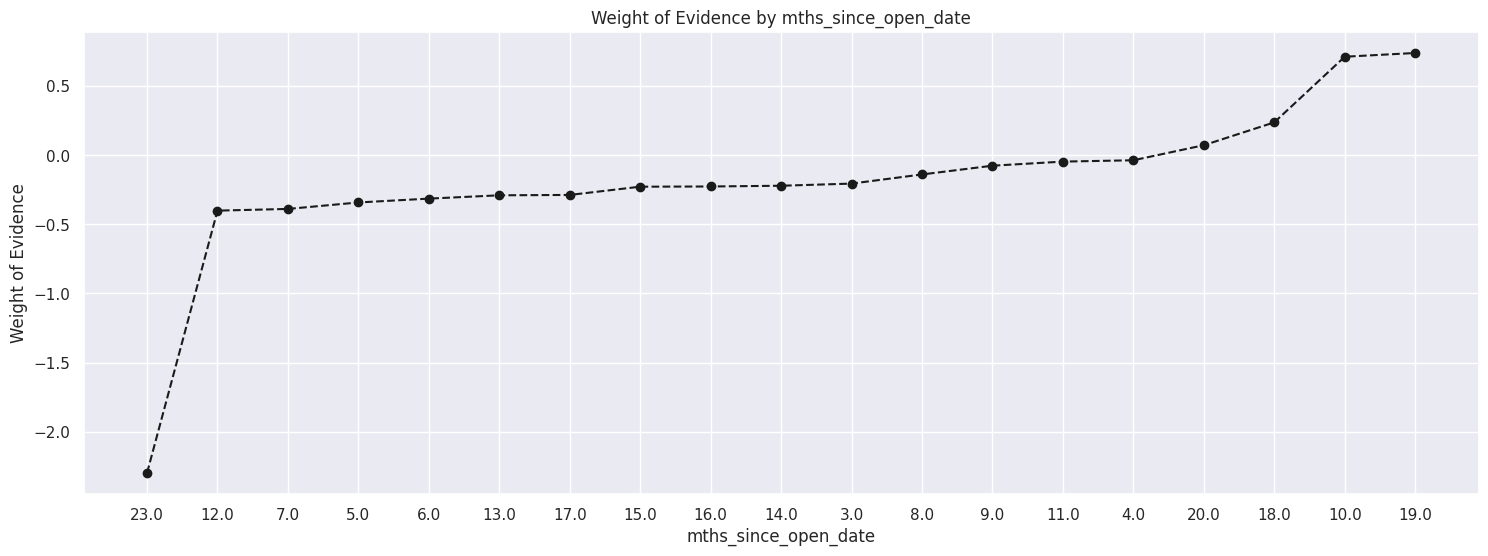

In [ ]:
# 'mths_since_open_date'
df_temp = woe_discrete(df_inputs_prepr, 'mths_since_open_date', df_targets_prepr)
plot_by_woe(df_temp)

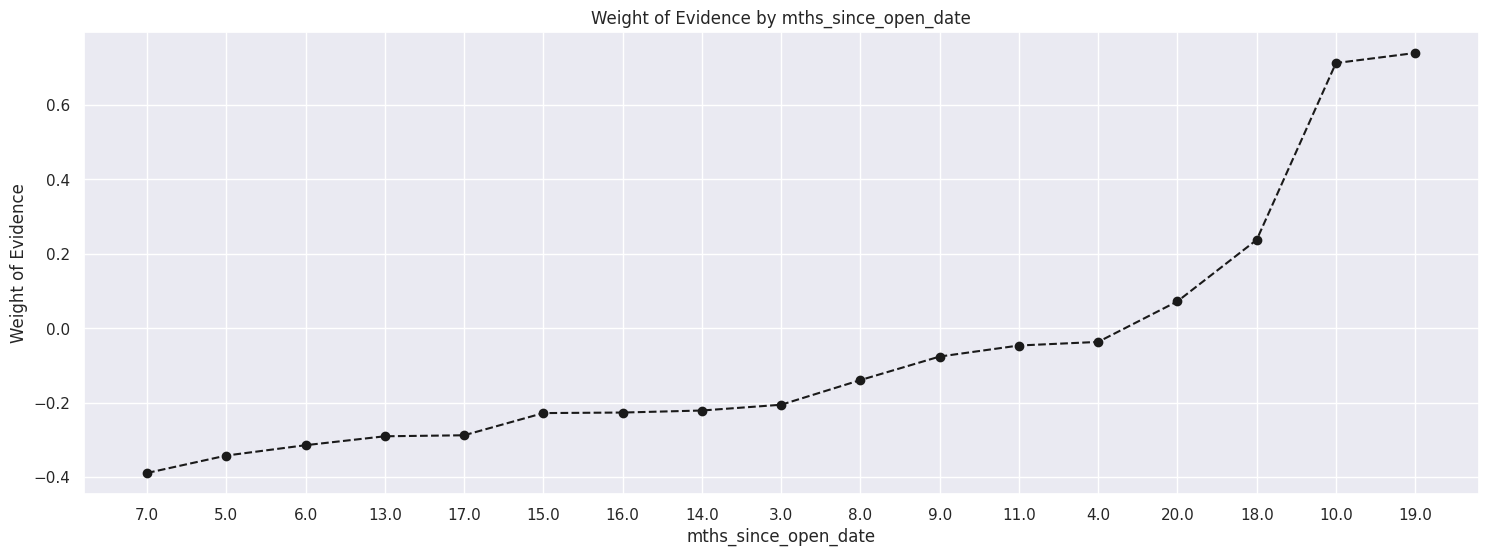

In [ ]:
plot_by_woe(df_temp.iloc[6: , : ])
#6?

# Dương comment:
# Anh sẽ email thêm cho em data của 2 biến nữa mà anh nghĩ sẽ liên quan nhiều là:
# biến mức độ giảm tài sản của Khách hàng và biến lần cuối cùng mở App của SSI ( mức độ tương tác của KH với SSI).

# Em bổ sung thêm file testing cho anh 2 biến này, trước khi làm bước add thêm 2 bước này thì em tạo thêm một file mới trên một branch riêng trên GitHub Repo hiện tại, 
# đặt tên là testing_v2_added_AppEngagement_NetAsssetChanges nhé. Anh đang muốn tập dùng GitHub cho quen.


### Preprocessing the Test Dataset



In [ ]:
data_inputs_train = df_inputs_prepr


In [ ]:
data_inputs_train = data_inputs_train.astype("object")
data_targets_train = data_targets_train.astype("object")
data_inputs_train.to_csv('data_inputs_train.csv')
data_targets_train.to_csv('data_targets_train.csv')